>Iris Classification

Overview
About Dataset
Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).



>Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import pearsonr 

import warnings 
warnings.filterwarnings('ignore')

>Loading the Dataset

In [3]:
data_frame = pd.read_csv("Task3-IrisFlowerPrediction\IRIS.csv")
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


>Data preprocessing

In [4]:
data_frame.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data_frame.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data_frame.duplicated().sum()

3

In [11]:
data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Scaling the Features. 

# In this dataset the Inputs are Sepal length, Sepal Width, Petal length, and Petal Width
# The Outputs = Species

# X => Inputs -> SepalLenghtCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# Y => Ouput -> Species

features = ["sepal_length","sepal_width","petal_length","petal_width"]
x = data_frame[features].values #Input
y = data_frame["species"].values #Output

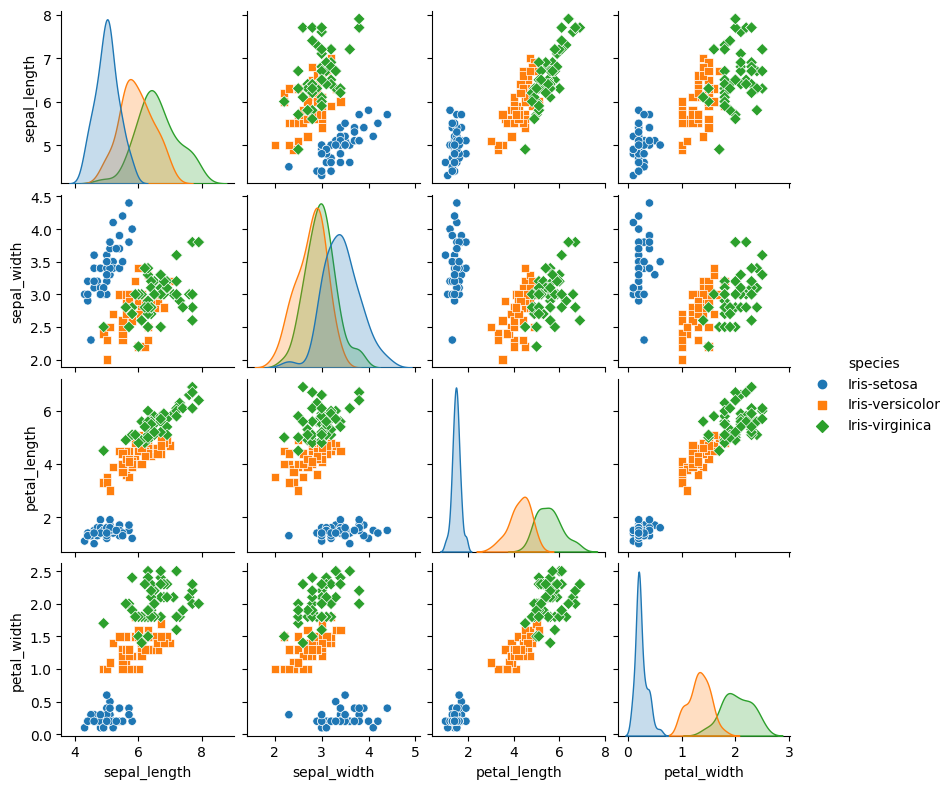

In [50]:
# Pair plot - to find the outliers

sns.pairplot(data_frame, hue="species", size=3, markers=["o", "s", "D"])

>This scatter plot gives us the glimpse of species of iris flower is more inclined towards the variables setal length and setal width

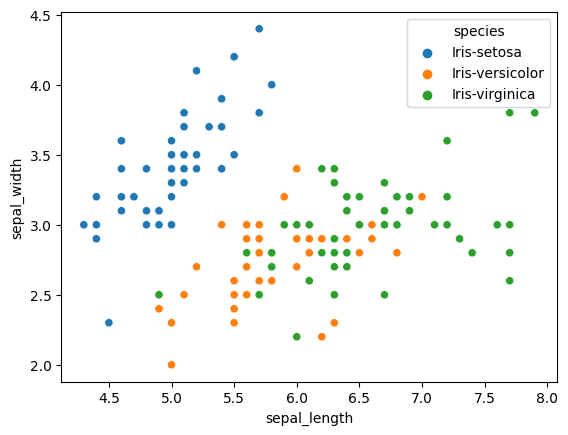

In [52]:
sns.scatterplot(data=data_frame, x="sepal_length", y="sepal_width",hue="species", markers=["o", "s", "D"]);

>This scatter plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width

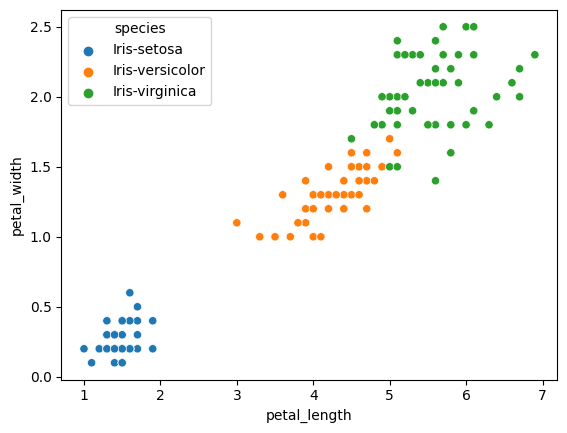

In [55]:
sns.scatterplot(data=data_frame, x="petal_length", y="petal_width",hue="species");


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

>Feature Scaling

In [17]:
# Seperate the data set into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

>Label Encoder

In [18]:
# Label Encoder
# A technique is used in Machine Learning to convert categorical variables into numerical format.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [19]:
# dir(le)

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
# Use mapping method to add the index to decode the output. 

mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [21]:
y = le.transform(y)

>Standard Scaler

In [22]:
# Standard Scaler - To make all attribute values in a similar range (Normalization)
# Removes the mean and scales each feature/variable to unit variance. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

>Model Training

In [23]:
# Model Training  Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

>Logistic Regression

In [74]:
# Fitting the values in Logistic Regression model
 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
model_RL_prediction = model.predict(X_test_scaled)

In [28]:

accuracy_score(model_RL_prediction, y_test)

1.0

>K-Nearest Neighbors

In [29]:
# Fitting the models in K-Nearest Neighbors (KNN)

classi = KNeighborsClassifier(n_neighbors=3)
classi.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
classi_KNN_pred = classi.predict(X_test_scaled)

In [72]:
accuracy_score(y_test, classi_KNN_pred)

0.9666666666666667

>Support Vector Classifier (SVC)

In [32]:
# Fitting the models in support Vector Classifier (SVC) 

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [33]:
svc_pred = svc.predict(X_test_scaled)

In [34]:
accuracy_score(y_test, svc_pred)

1.0

>Naive Bayes

In [35]:
# Fitting the models in Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(X_train_scaled, y_train)

GaussianNB()

In [36]:
naive_b_pred = naive_b.predict(X_test_scaled)


In [37]:
accuracy_score(y_test, naive_b_pred)


0.9666666666666667

>Models Evaluation

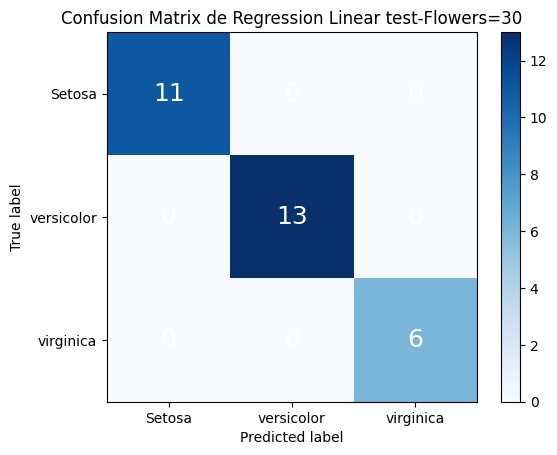

In [77]:
# Confusion Matrix
confusion_matrix(y_test, model_RL_prediction)
true_labels = y_test
predicted_labels=  model_RL_prediction

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix de Regression Linear test-Flowers=30')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white',size='18')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



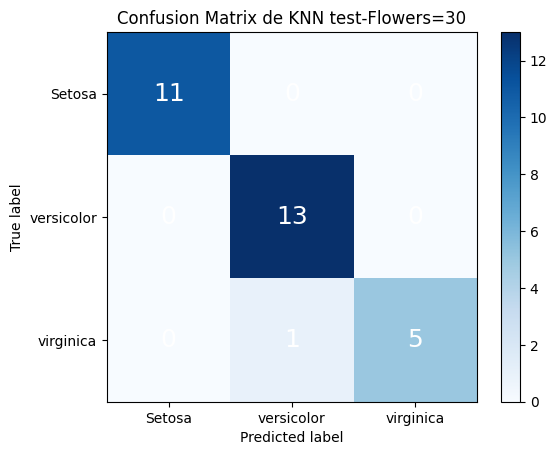

In [73]:
confusion_matrix(y_test, classi_KNN_pred)
true_labels = y_test
predicted_labels=  classi_KNN_pred

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix de KNN test-Flowers=30')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white',size='18')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

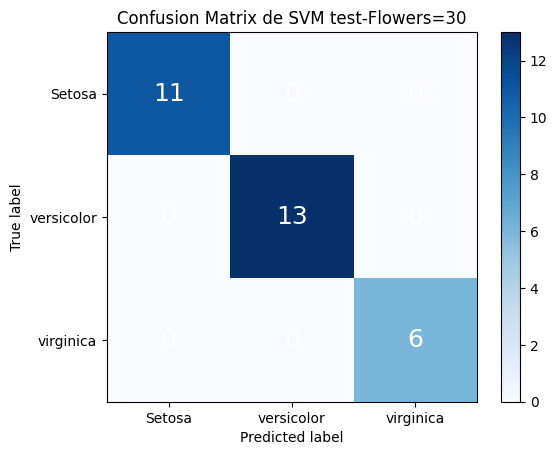

In [79]:
confusion_matrix(y_test, svc_pred)
true_labels = y_test
predicted_labels=  svc_pred

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix de SVM test-Flowers=30')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white',size='18')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



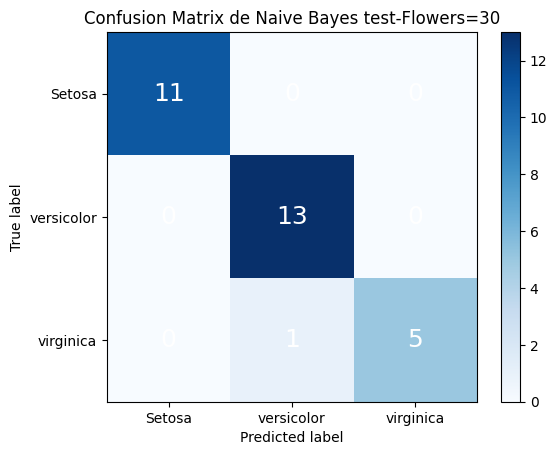

In [68]:
confusion_matrix(y_test, naive_b_pred)
true_labels = y_test
predicted_labels=  naive_b_pred

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix de Naive Bayes test-Flowers=30')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white',size='18')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [42]:
# All Model Scores

results = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Score' : [1.0, 1.0, 0.96, 0.96]
})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
1.00,Logistic Regression
1.00,SVM
0.96,KNN
0.96,Naive Bayes
